Силы натяжения для масс:
[10.2066185, 15.127859499999998, 19.4209405, 18.4178475, 5.7290155]

Скорости волны по МНК:
[139.02857142857144, 165.9035714285715, 188.52285714285705, 196.59999999999997, 100.94285714285712]
Соответствующие погрешности:
[0.7992697914635025, 0.19122990757167432, 9.631958850230033, 0.23094010768887271, 9.939777848295728]

Скорости волны по формуле sqrt(T / ρl):
[134.0028102943515, 163.14046901964372, 184.84516458325328, 180.00824664430732, 100.39520341332316]

Погонная плотность струны по МНК = 521.8 мг/м
Погрешность этой плотности = 15.2 мг/м


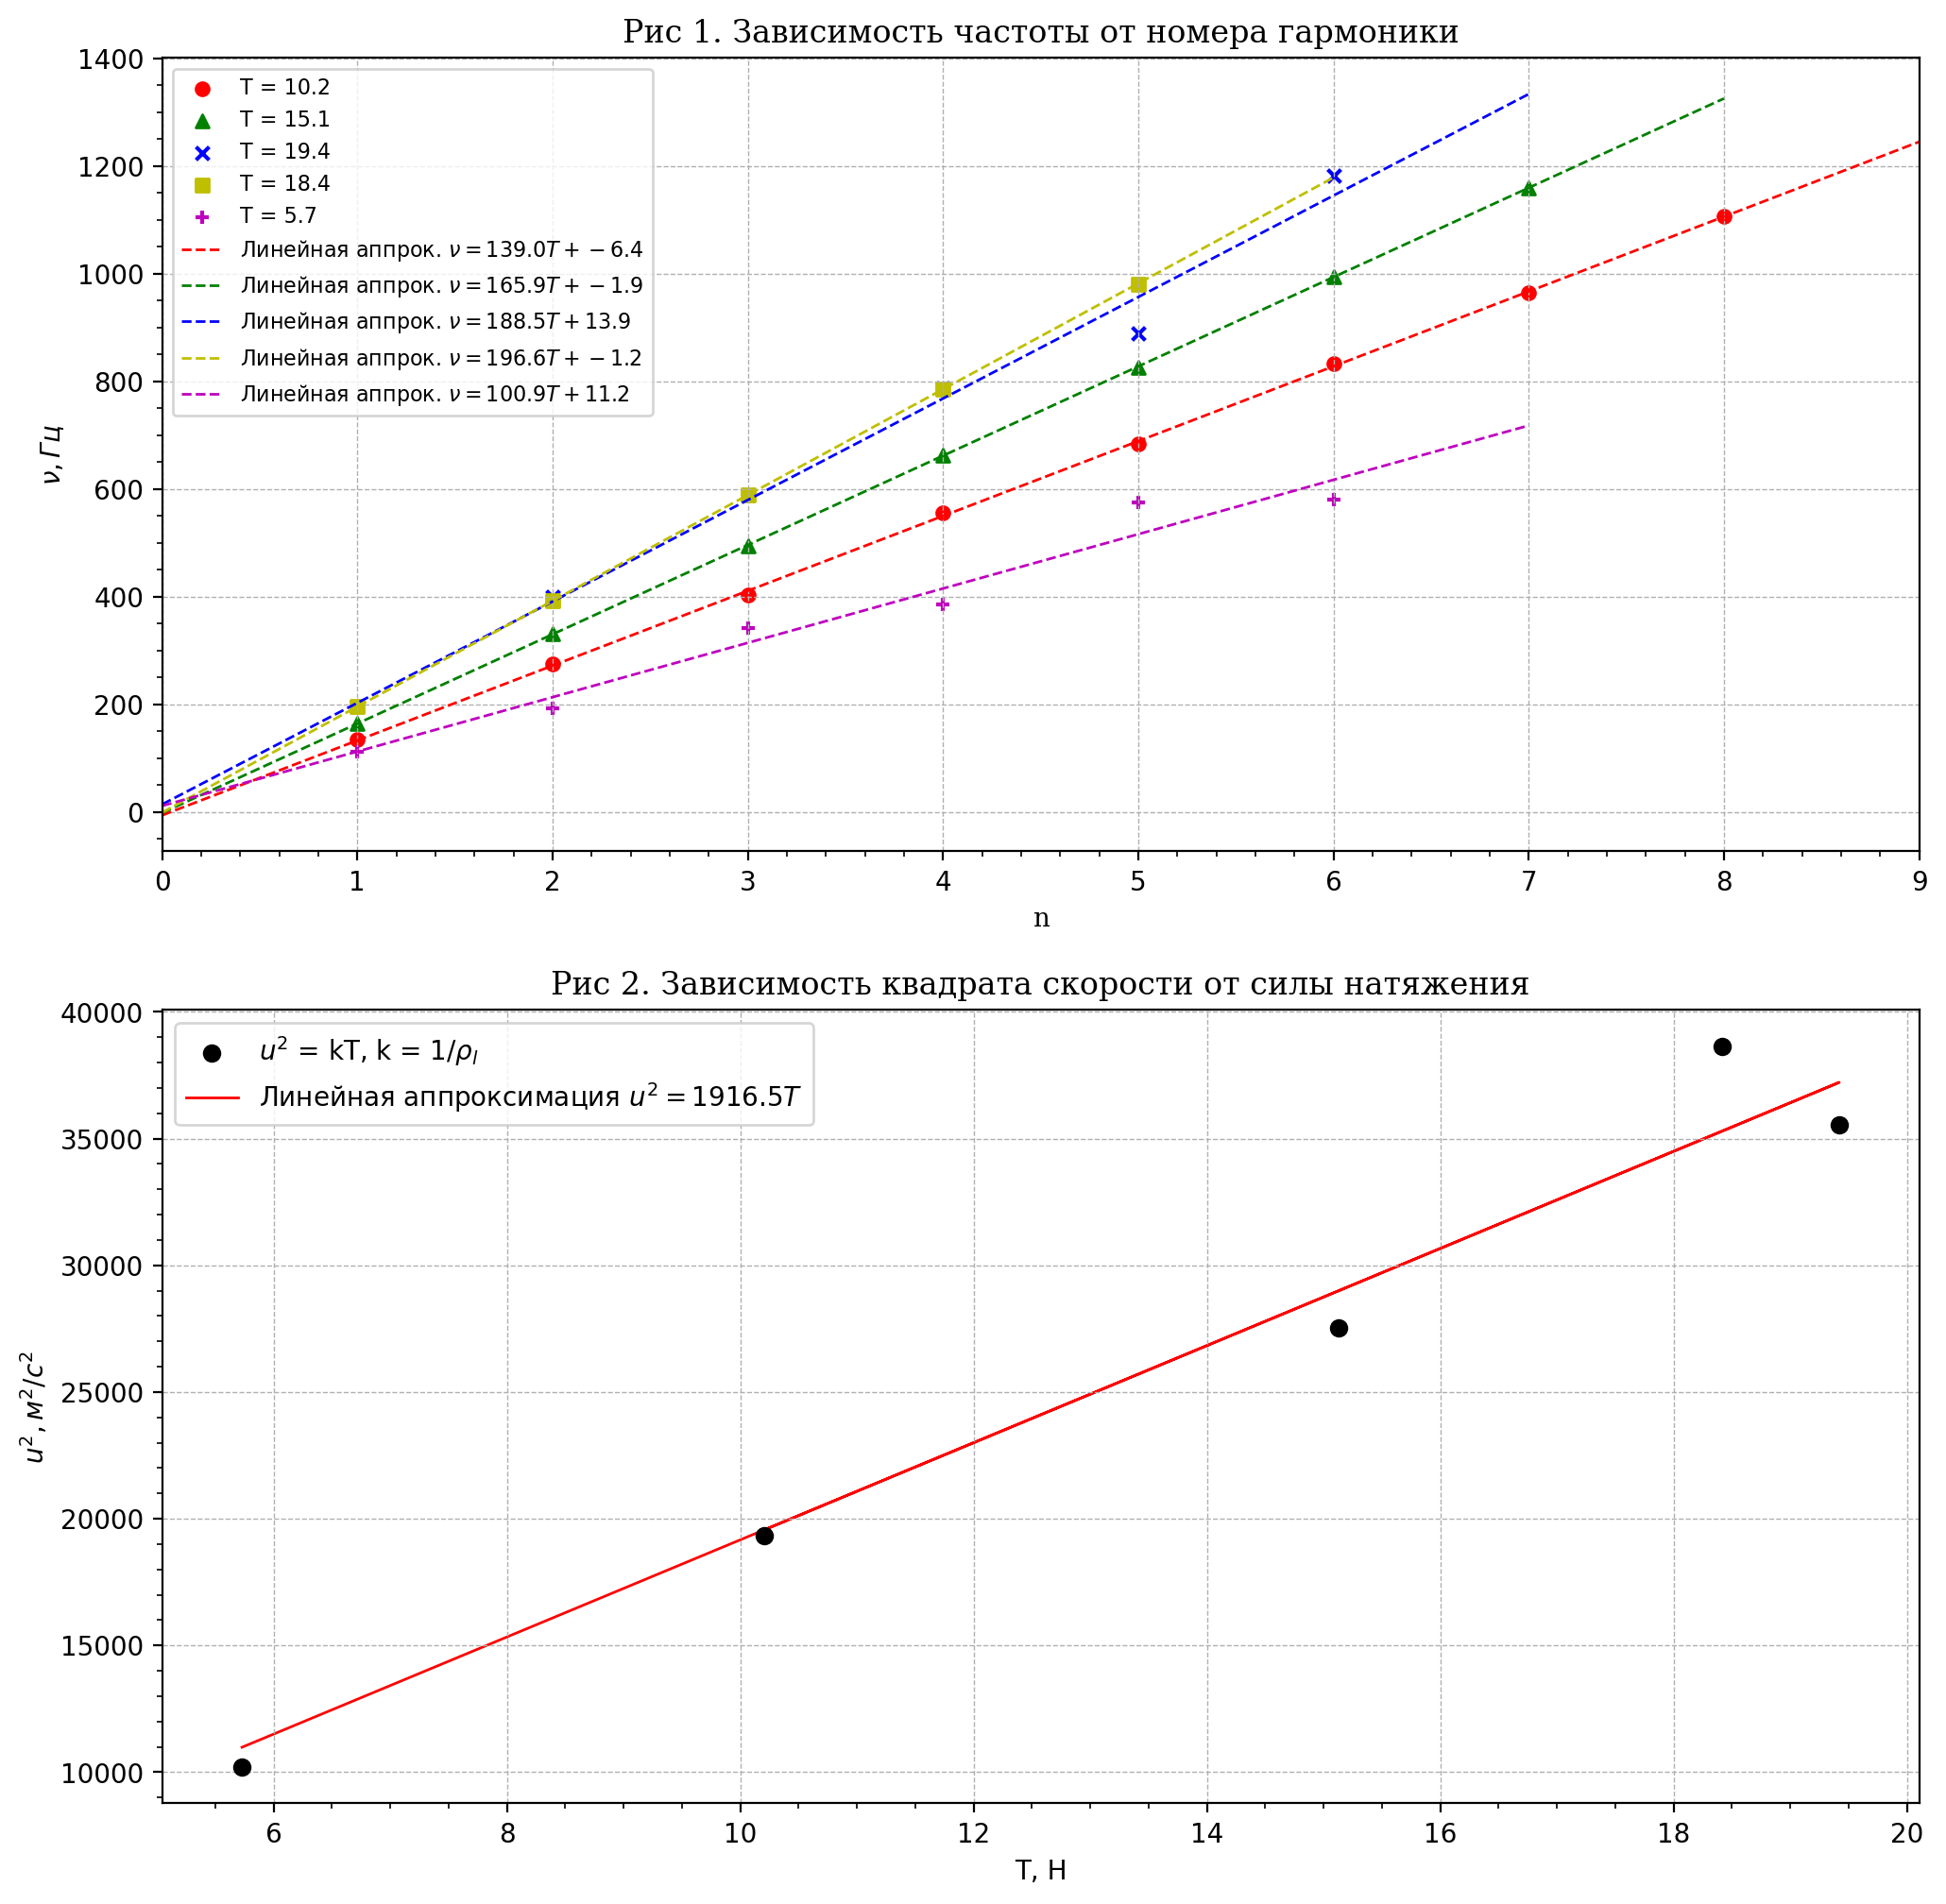

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np  

def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

# Data setup
L = 50 / 1e2
g = 9.815
ρl = 568.4 / (1e3 * 1e3)

ms = np.array([1039.9, 1541.3, 1978.7, 1876.5, 583.7]) / 1e3
Ts = [m * g for m in ms]
print(f'Силы натяжения для масс:\n{Ts}\n')
Ts = np.array(Ts)

freqs1 = np.array([134.4, 274, 402.6, 555, 684, 833, 964, 1107])
# [138.9, 277.8, 416.7, 555.6, 714, 833, 952.4, 1111, 1052.6]
freqs2 = np.array([163.9, 331, 495, 662, 826, 994, 1160])
# [166.6, 333, 500, 660, 833, 1000, 1111]
freqs3 = np.array([196, 399, 589, 787.3, 889, 1182])
# [200, 400, 588, 769.2, 909, 1170]
freqs4 = np.array([195, 392, 589, 786, 981])  # Частота 982 на 6й гармонике ИСКЛЮЧЕНА!
#[192.3, 384.6, 555, 833, 1000, 952]
freqs5 = np.array([112, 192, 342, 386, 575, 580])
#[100.4, 178.5, 357, 384, 555.5, 555]

ns1, ns2, ns3, ns4, ns5 = np.arange(1, len(freqs1) + 1), \
                          np.arange(1, len(freqs2) + 1), \
                          np.arange(1, len(freqs3) + 1), \
                          np.arange(1, len(freqs4) + 1), \
                          np.arange(1, len(freqs5) + 1)

### ГРАФИК
figure, axes = plt.subplots(2, 1, figsize=(12, 12), dpi=700)
for ax in axes:
    ax.minorticks_on()
    ax.grid(which='major', linestyle='--', linewidth=0.5) # '-', '--', '-.', ':', '',

font = {'fontname': 'DejaVu Serif'}

ax1 = axes[0]
ax1.set_ylabel('$ν, Гц$', **font)
ax1.set_xlabel('n', **font)
ax1.set_title('Рис 1. Зависимость частоты от номера гармоники', wrap=True, **font)

PR = 1
ax1.scatter(ns1, freqs1, marker='o', s = 25, color='r', label=f'T = {Ts[0]:.{PR}f}')
ax1.scatter(ns2, freqs2, marker='^', s = 25, color='g', label=f'T = {Ts[1]:.{PR}f}')
ax1.scatter(ns3, freqs3, marker='x', s = 25, color='b', label=f'T = {Ts[2]:.{PR}f}')
ax1.scatter(ns4, freqs4, marker='s', s = 25, color='y', label=f'T = {Ts[3]:.{PR}f}')
ax1.scatter(ns5, freqs5, marker='+', s = 25, color='m', label=f'T = {Ts[4]:.{PR}f}')

(k1, b1) = np.polyfit(ns1, freqs1, 1)
(k2, b2) = np.polyfit(ns2, freqs2, 1)
(k3, b3) = np.polyfit(ns3, freqs3, 1)
(k4, b4) = np.polyfit(ns4, freqs4, 1)
(k5, b5) = np.polyfit(ns5, freqs5, 1)

ng1 = np.arange(0, len(freqs1) + 2)
ng2 = np.arange(0, len(freqs2) + 2)
ng3 = np.arange(0, len(freqs3) + 2)
ng4 = np.arange(0, len(freqs4) + 2)
ng5 = np.arange(0, len(freqs5) + 2)
ax1.plot(ng1, k1 * ng1 + b1, '--r', linewidth=1, label=f'Линейная аппрок. $ ν = {k1:.1f}T + {b1:.1f}$')
ax1.plot(ng2, k2 * ng2 + b2, '--g', linewidth=1, label=f'Линейная аппрок. $ ν = {k2:.1f}T + {b2:.1f}$')
ax1.plot(ng3, k3 * ng3 + b3, '--b', linewidth=1, label=f'Линейная аппрок. $ ν = {k3:.1f}T + {b3:.1f}$')
ax1.plot(ng4, k4 * ng4 + b4, '--y', linewidth=1, label=f'Линейная аппрок. $ ν = {k4:.1f}T + {b4:.1f}$')
ax1.plot(ng5, k5 * ng5 + b5, '--m', linewidth=1, label=f'Линейная аппрок. $ ν = {k5:.1f}T + {b5:.1f}$')
ax1.set_xlim(0, 9)

u1 = k1 * 2 * L
u2 = k2 * 2 * L
u3 = k3 * 2 * L
u4 = k4 * 2 * L
u5 = k5 * 2 * L
us = [u1, u2, u3, u4, u5]

print(f'Скорости волны по МНК:\n{us}')
us_Ts = [np.sqrt(T / ρl) for T in Ts]
# Погрешность u:
sigma_us = [
    np.sqrt( 1 / (len(x) - 2) ) * np.sqrt( (np.mean(y*y) - np.mean(y)**2) / (np.mean(x*x) - np.mean(x)**2) - k**2)
    for k, x, y in zip( [k1, k2, k3, k4, k5], [ns1, ns2, ns3, ns4, ns5], [freqs1, freqs2, freqs3, freqs4, freqs5] )
]
print(f'Соответствующие погрешности:\n{sigma_us}\n')
print(f'Скорости волны по формуле sqrt(T / ρl):\n{us_Ts}\n')

ussq = []
for u in us:
  ussq.append(np.square(u))
ussq = np.array(ussq)

### ----- Построение графиков -------

ax2 = axes[1]
ax2.set_title('Рис 2. Зависимость квадрата скорости от силы натяжения', wrap=True, **font)
ax2.set_xlabel('T, H')
ax2.set_ylabel('$u^2, м^2/c^2$')

ax2.scatter(Ts, ussq, marker='o', color='k', label=r'$u^2$ = kT, k = $1/ρ_l$', zorder=2)

# (k_tu, b_tu) = np.polyfit(Ts, ussq, 1)
(k_tu, s_k)= lin_ls(Ts, ussq, through_null=True)
ax2.plot(Ts, k_tu * Ts, 'r', linewidth=1, label=f'Линейная аппроксимация $ u^2 = {k_tu:.1f}T$', zorder=1)

# Α α Β β Γ γ Δ δ Ε ε Ζ ζ Η η Θ θ Ι ι Κ κ Λ λ Μ μ Ν ν Ξ ξ Ο ο Π π Ρ ρ Σ σ Τ τ Υ υ Φ φ Χ χ Ψ ψ Ω ω

ρ_l = 1 / k_tu
ρ_l *= 1e6
print(f'Погонная плотность струны по МНК = {ρ_l:.{PR}f} мг/м')
sigma_ρ = s_k / np.square(k_tu)
sigma_ρ *= 1e6
print(f'Погрешность этой плотности = {sigma_ρ:.{PR}f} мг/м')

ax1.legend(fontsize=8)
ax2.legend()